### USING PCA TO ACHIEVE SEPARABILITY

In [1]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


### Looking at the Data

In [ ]:
#First look at the data
df.info()

In [ ]:
df.head()

In [ ]:
df['target'].unique()

In [ ]:
df.describe()

In [ ]:
sns.heatmap(df.isna(),cbar=False)

In [ ]:
corrMat = df.corr()
ax =sns.heatmap(corrMat,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [ ]:
X = StandardScaler().fit_transform(x)

In [ ]:
(x[:10],X[:10])

In [ ]:
print(f"Before standard transofrmation:")
print((min(x[:][0]),max(x[:][0])))
print(f"After standard transofrmation:")
print((min(X[:][0]),max(X[:][0])))

In [ ]:
pca = PCA(2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])
principalDf.shape
#Add target column
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### LESS SEPARATED BEFORE PCA

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(features[0], fontsize = 15)
ax.set_ylabel(features[1], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(df.loc[indicesToKeep, features[0]]
               , df.loc[indicesToKeep, features[1]]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(features[-1], fontsize = 15)
ax.set_ylabel(features[-2], fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(df.loc[indicesToKeep, features[-1]]
               , df.loc[indicesToKeep, features[-2]]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
print(f'Amount of variance explained by PC1 and PC2 {sum(pca.explained_variance_ratio_)}')

### PCA TO SPEED UP LEARNING

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.data.shape

In [ ]:
#choose the minimum number of principal components such that 95% of the variance is retained
pca = PCA(.95)

In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
pca.fit(train_img)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

In [ ]:
logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
logisticRegr.predict(test_img[0:10])

In [ ]:
logisticRegr.score(test_img, test_lbl)

### PCA without SKLEARN

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
X = df[['sepal length','sepal width', 'petal length' , 'petal width']].to_numpy()

In [54]:
X.shape
N = X.shape[0]

In [55]:
X_mean=X.mean(axis=0).reshape((1,4))

In [66]:
import numpy as np
S=np.zeros((4,4))
for n in range(N):
    T = X[n]-X_mean
    S+=np.dot(T.T,T)
S/=N
# T = X-X_mean
# S = np.dot(T.T,T)/N
S.shape

(4, 4)

In [67]:
eigVals = np.linalg.eig(S)[0]
eigVectors = np.linalg.eig(S)[1]

In [68]:
sample_variance = X.var(axis=0).sum()
sample_variance

4.538829333333333

In [69]:
eigVals.sum()

4.538829333333339

In [70]:
PC1 = eigVectors[:,0].reshape((4,1))
PC2 = eigVectors[:,1].reshape((4,1))
PC3 = eigVectors[:,2].reshape((4,1))
PC4 = eigVectors[:,3].reshape((4,1))

In [71]:
eigVectors

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

In [72]:
X.shape

(150, 4)

In [73]:
PC = np.c_[PC1,PC2]
X_transformed = np.dot(X,PC)
X_transformed.shape

(150, 2)

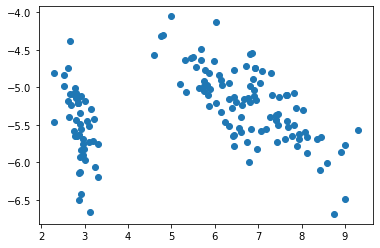

In [74]:
plt.scatter(X_transformed[:,0],X_transformed[:,1])
plt.show()

In [75]:
PC_v2 = np.c_[PC3,PC4]
X_transformed_v2 = np.dot(X,PC_v2)
X_transformed_v2.shape

(150, 2)

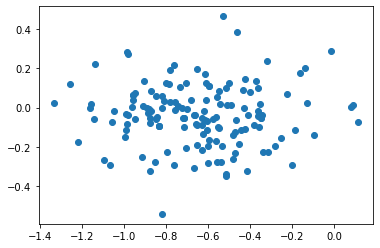

In [76]:
plt.scatter(X_transformed_v2[:,0],X_transformed_v2[:,1])
plt.show()

### Compare with LDA - for class separability

In [27]:
labels = df['target'].unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
#Get rows corresponding to each class
idx0 = df['target']==labels[0]
idx1 = df['target']==labels[1]
idx2 = df['target']==labels[2]

#Filtering out the data corresponding the 3 classes
X0 = X[idx0]
X1 = X[idx1]
X2 = X[idx2]
print(X0.shape,X1.shape,X2.shape)

(50, 4) (50, 4) (50, 4)


In [78]:
mTotal = X.mean(axis=0).reshape((1,4))
m0 = X0.mean(axis=0).reshape((1,4))
m1 = X1.mean(axis=0).reshape((1,4))
m2 = X2.mean(axis=0).reshape((1,4))

In [87]:
T0 = X0-m0
S0 = np.dot(T0.T,T0)

T1 = X1-m1
S1 = np.dot(T1.T,T1)

T2 = X2-m2
S2 = np.dot(T2.T,T2)

S_W = S0+S1+S2
print(S_W.shape)

T_total = X-mTotal
S_T = np.dot(T_total.T,T_total)
print(S_T.shape)

S_B = S_T-S_W

S_B

(4, 4)
(4, 4)


array([[ 63.21213333, -19.534     , 165.16466667,  71.36306667],
       [-19.534     ,  10.9776    , -56.0552    , -22.4924    ],
       [165.16466667, -56.0552    , 436.64373333, 186.90813333],
       [ 71.36306667, -22.4924    , 186.90813333,  80.60413333]])

In [88]:
S = np.dot(np.linalg.inv(S_W),S_B)
eigVals = np.linalg.eig(S)[0]
eigVectors = np.linalg.eig(S)[1]

In [92]:
LD1 = eigVectors[:,0].reshape((4,1))
LD2 = eigVectors[:,1].reshape((4,1))
LD3 = eigVectors[:,2].reshape((4,1))
LD4 = eigVectors[:,3].reshape((4,1))

In [93]:
eigVectors

array([[ 0.20490976, -0.00898234, -0.88241048,  0.488945  ],
       [ 0.38714331, -0.58899857,  0.26885727, -0.44323062],
       [-0.54648218,  0.25428655,  0.2382422 , -0.48681269],
       [-0.71378517, -0.76703217,  0.3038226 ,  0.57226987]])

In [96]:
LDC = np.c_[LD1,LD2]
X_transformed_LDA = np.dot(X,LDC)
X_transformed_LDA.shape

(150, 2)

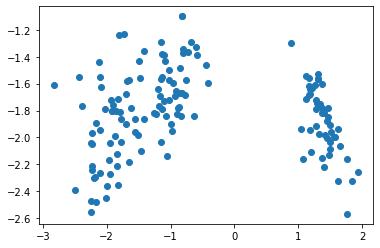

In [98]:
plt.scatter(X_transformed_LDA[:,0],X_transformed_LDA[:,1])
plt.show()